# PCA(Principle Component Analysis)

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,scale
from mlxtend.preprocessing import TransactionEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [160]:
df=pd.read_csv("wine.csv")

In [161]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [162]:
df.tail()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [164]:
df.shape

(178, 14)

In [165]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [166]:
df['Type'].unique()

array([1, 2, 3])

In [167]:
df['Type']=df['Type'].astype('category')

In [168]:
df.drop('Type',axis=1,inplace=True)

In [169]:
df.isnull().sum()

Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [170]:
df.duplicated().sum()

np.int64(0)

<Axes: >

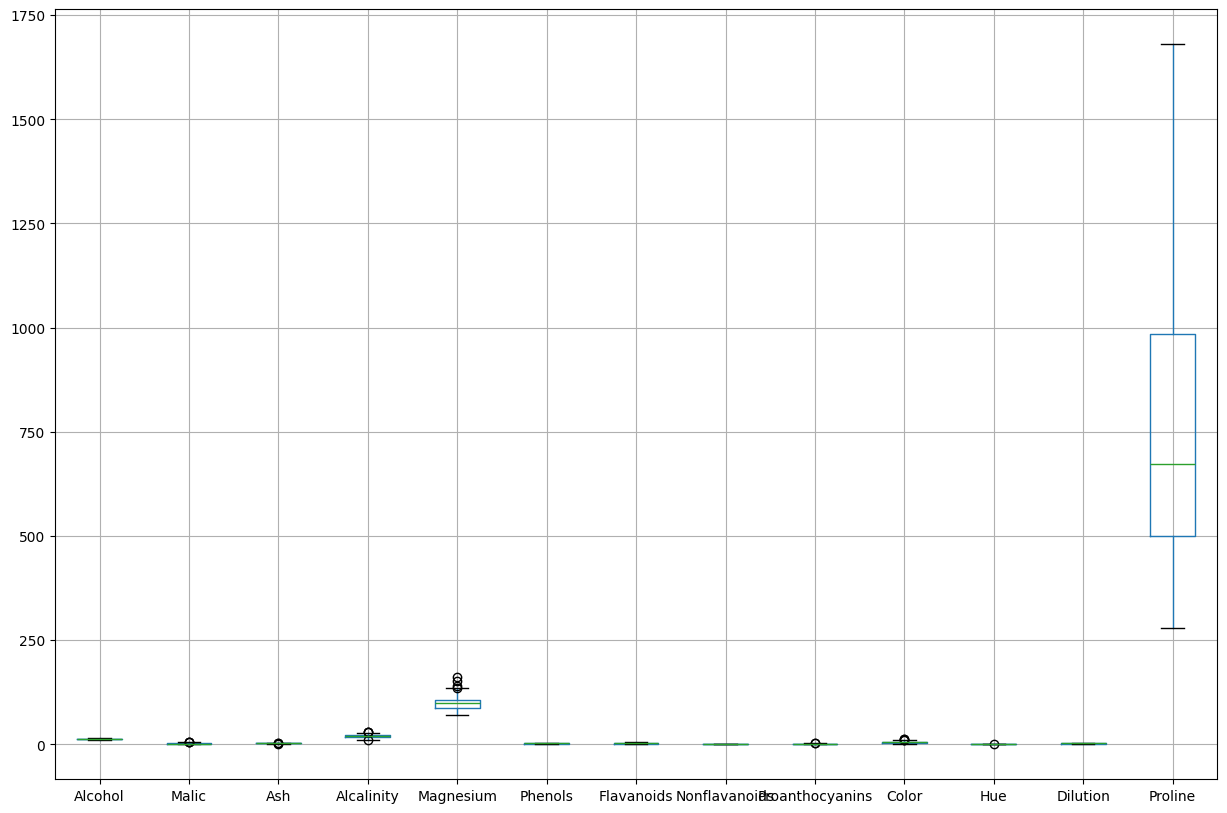

In [171]:
# Box plot for all the cols
plt.figure(figsize=(15,10))
df.boxplot()

In [172]:
features=[x for x in df.columns if df[x].dtype!='category']

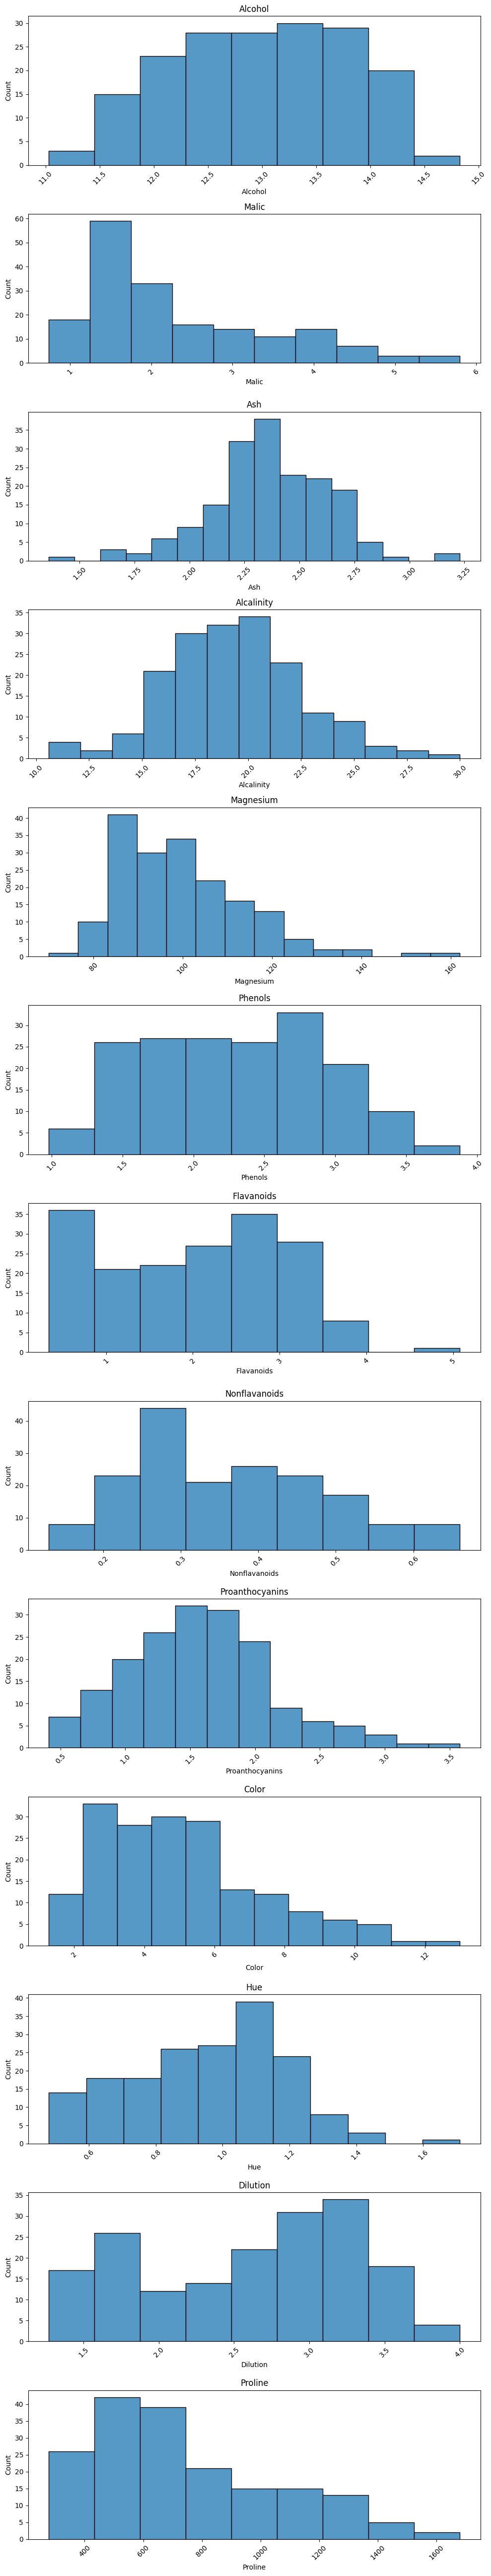

In [173]:
fig, axes = plt.subplots(len(features), 1, figsize=(10, 4*len(features)))
for i,col in enumerate(features):
    sns.histplot(x=col,data=df,ax=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


<Axes: >

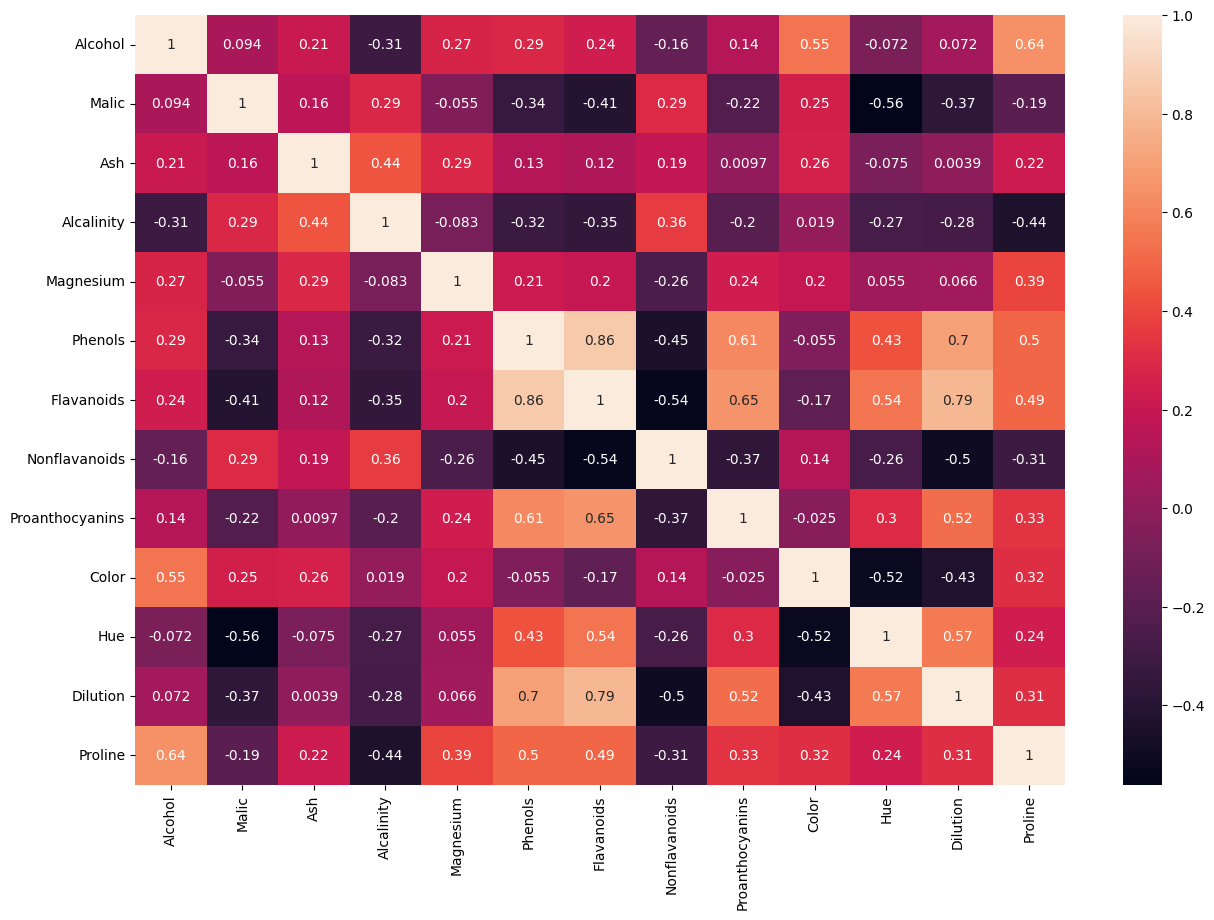

In [174]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap=None)

In [175]:
# From the above data phenols and Flavanoids are +vely related and also Dilution with Flavanoids

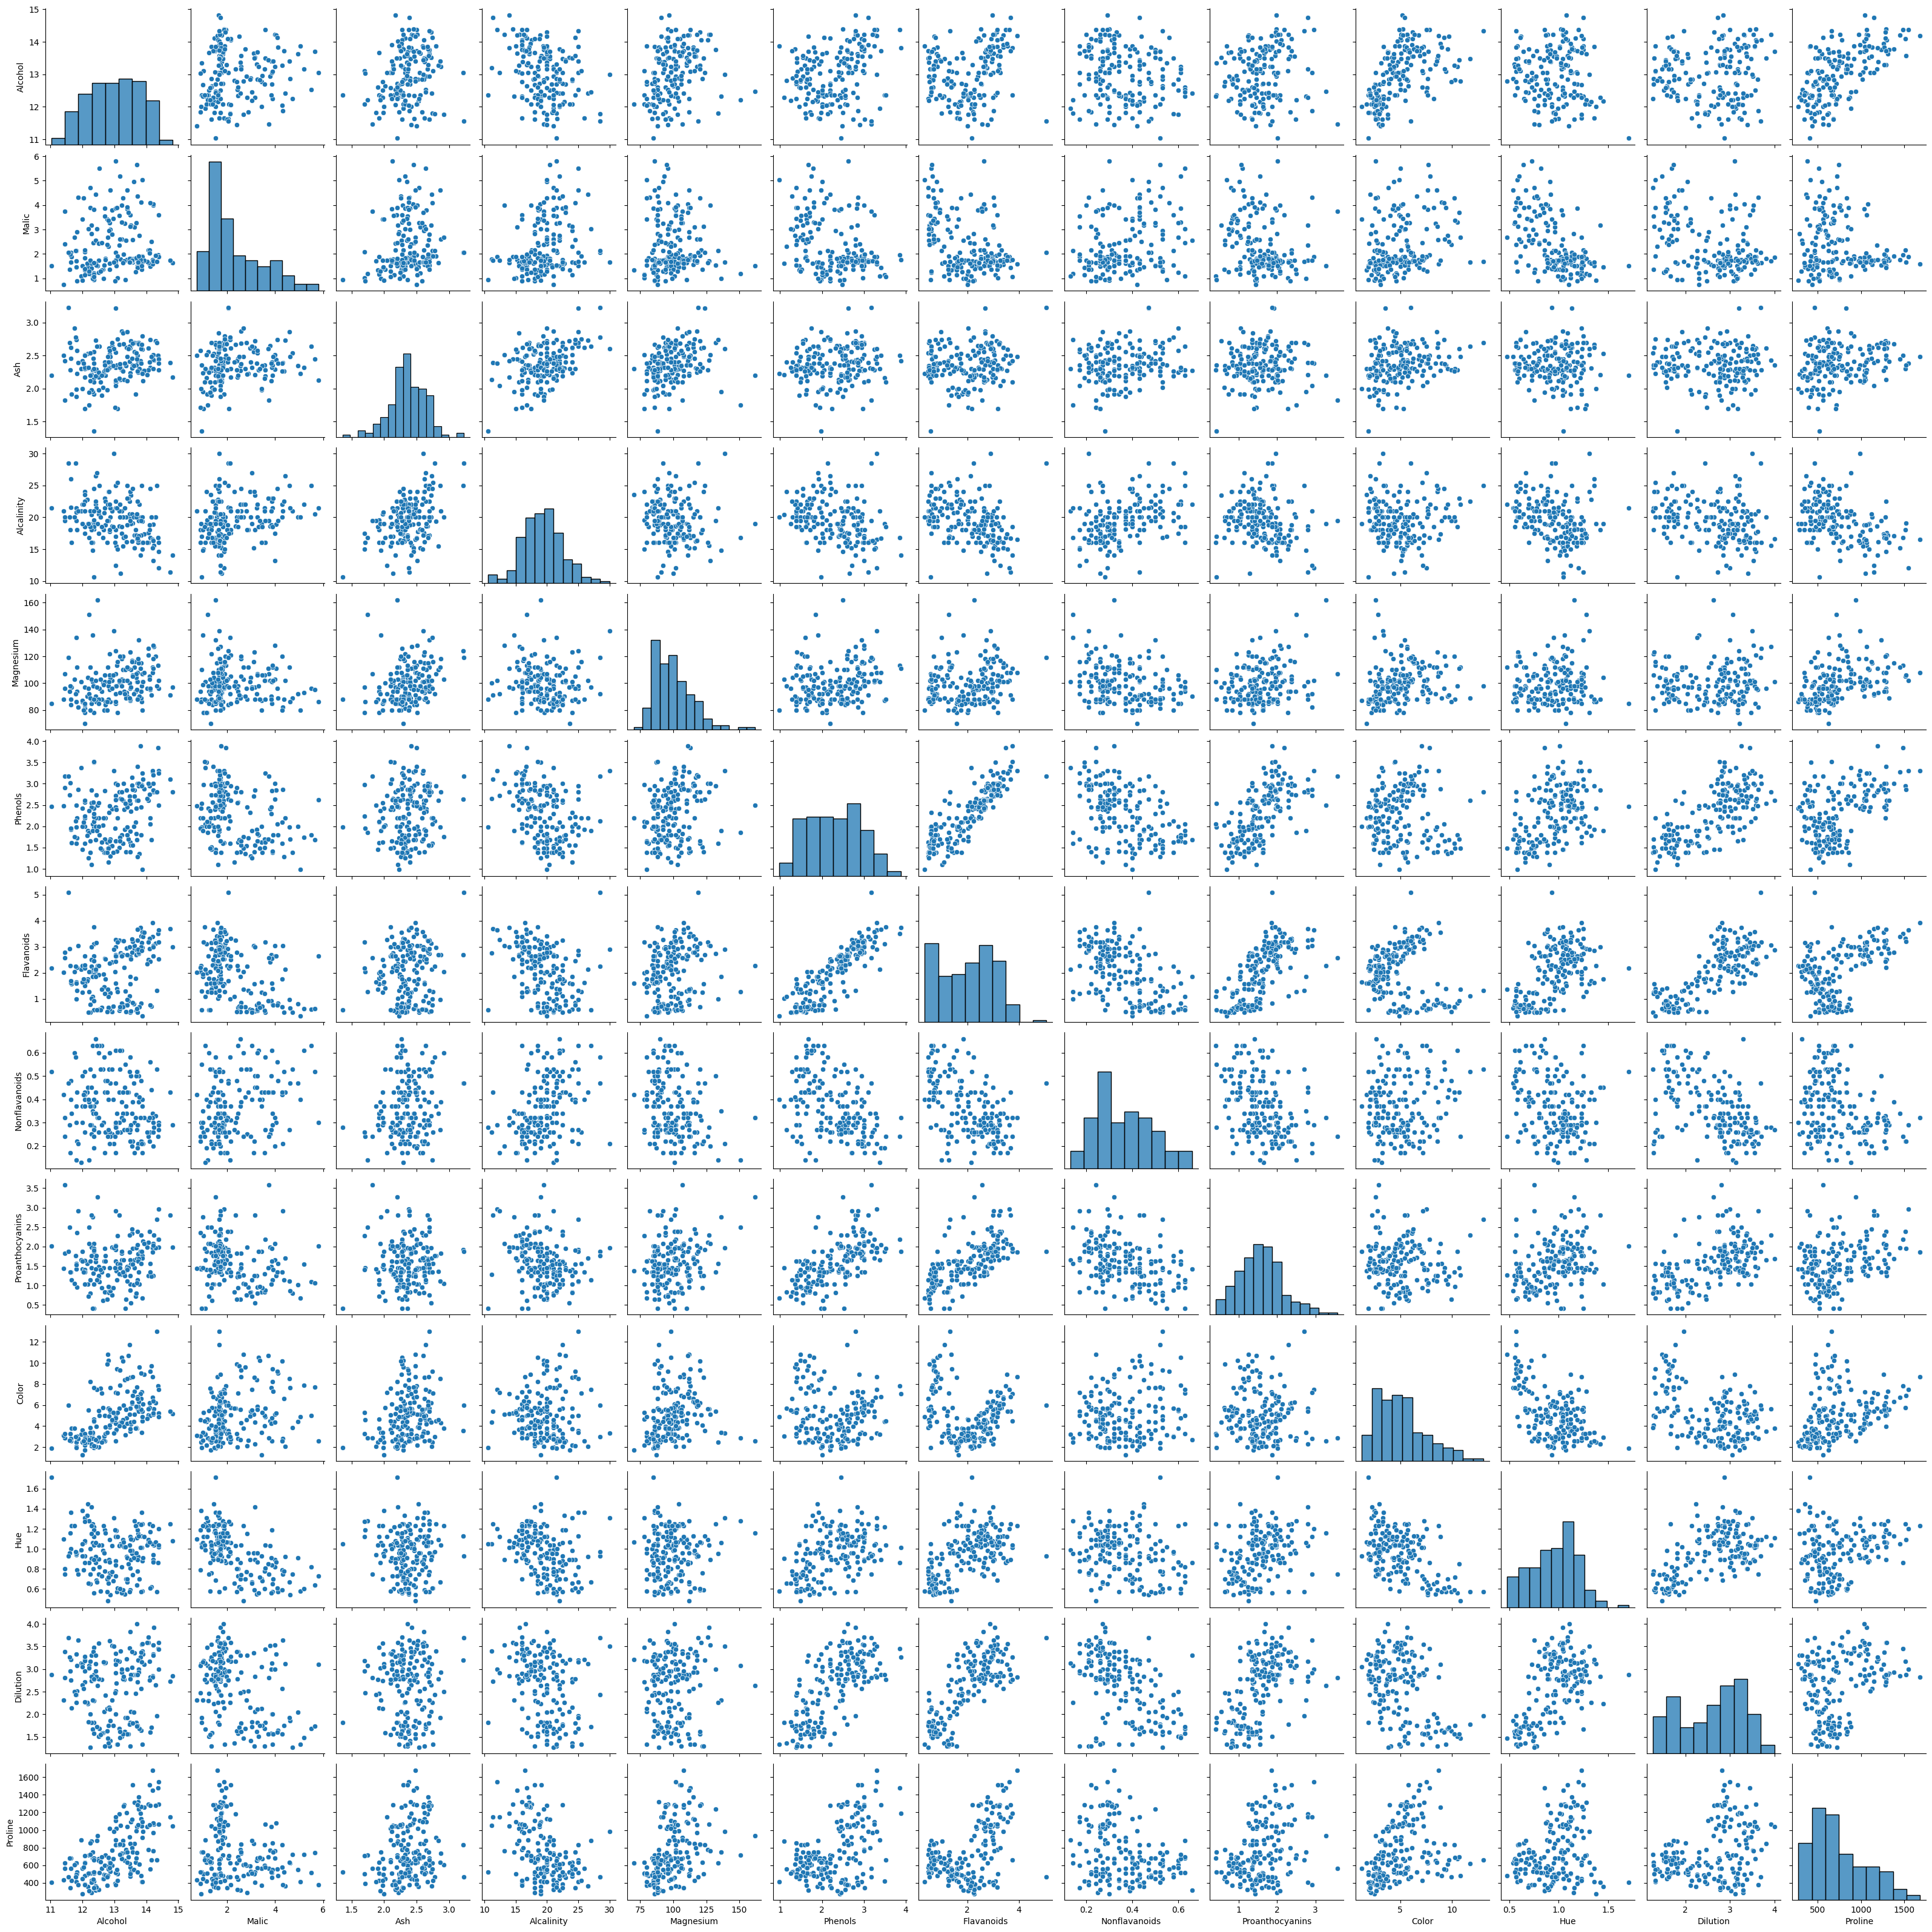

In [176]:
sns.pairplot(df)

In [177]:
data=scale(df)

In [178]:
data

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]], shape=(178, 13))

### Dimentionality Reduction with PCA

In [179]:
pca=PCA()

In [180]:
pca_values=pca.fit_transform(data) # To get the Principle Compinents

In [181]:
pca_df=pd.DataFrame(pca_values)

In [182]:
pca_df# Principle conponents data frame

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3.316751,1.443463,-0.165739,-0.215631,0.693043,0.223880,0.596427,-0.065139,-0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,-0.333393,-2.026457,-0.291358,-0.257655,0.927120,0.053776,-1.024416,0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,1.031151,0.982819,0.724902,-0.251033,-0.549276,0.424205,0.344216,1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,2.756372,-0.176192,0.567983,-0.311842,-0.114431,-0.383337,-0.643593,-0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,0.869831,2.026688,-0.409766,0.298458,0.406520,0.444074,-0.416700,-0.326819,-0.078366,-0.525945,-0.216664,-0.079364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-3.370524,2.216289,-0.342570,1.058527,-0.574164,1.108788,0.958416,0.146097,0.022498,-0.304117,0.139228,0.170786,-0.114427
174,-2.601956,1.757229,0.207581,0.349496,0.255063,0.026465,0.146894,0.552427,0.097969,-0.206061,0.258198,-0.279431,-0.187371
175,-2.677839,2.760899,-0.940942,0.312035,1.271355,-0.273068,0.679235,-0.047024,-0.001222,-0.247997,0.512492,0.698766,0.072078
176,-2.387017,2.297347,-0.550696,-0.688285,0.813955,-1.178783,0.633975,-0.390829,-0.057448,0.491490,0.299822,0.339821,-0.021866


In [183]:
# To get weights
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [ 0.48365155,  0.22493093,  0.31606881, -0.0105905 ,  0.299634  ,
         0.06503951, -0.00335981,  0.02877949,  0.03930172,  0.52999567,
        -0.27923515, -0.16449619,  0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [ 0.21353865,  0.536813

In [184]:
# variance
var=pca.explained_variance_ratio_

In [185]:
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [186]:
cum_var=np.cumsum(np.round(var,4))
cum_var

array([0.362 , 0.5541, 0.6653, 0.736 , 0.8016, 0.851 , 0.8934, 0.9202,
       0.9424, 0.9617, 0.9791, 0.9921, 1.0001])

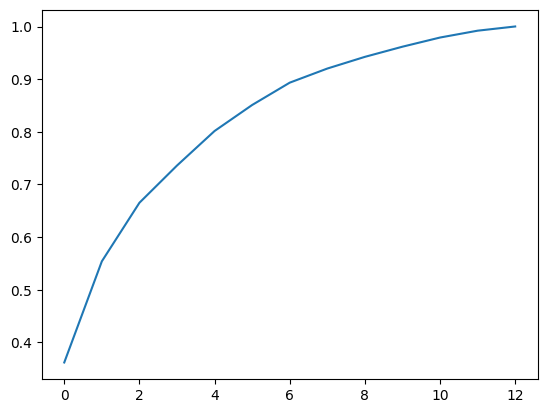

In [187]:
# Plot variance=
plt.plot(cum_var)

In [188]:
# From the above cumulatibve variance and the plot we get approimately 90% of information from the 7 columns 

In [189]:
pca_df_1=pca_df.iloc[:,:7]

In [190]:
pca_df_1 # From this pca data we have 90% of information from original data

,0,1,2,3,4,5,6
0,3.316751,1.443463,-0.165739,-0.215631,0.693043,0.223880,0.596427
1,2.209465,-0.333393,-2.026457,-0.291358,-0.257655,0.927120,0.053776
2,2.516740,1.031151,0.982819,0.724902,-0.251033,-0.549276,0.424205
3,3.757066,2.756372,-0.176192,0.567983,-0.311842,-0.114431,-0.383337
4,1.008908,0.869831,2.026688,-0.409766,0.298458,0.406520,0.444074
...,...,...,...,...,...,...,...
173,-3.370524,2.216289,-0.342570,1.058527,-0.574164,1.108788,0.958416
174,-2.601956,1.757229,0.207581,0.349496,0.255063,0.026465,0.146894
175,-2.677839,2.760899,-0.940942,0.312035,1.271355,-0.273068,0.679235
176,-2.387017,2.297347,-0.550696,-0.688285,0.813955,-1.178783,0.633975


In [191]:
Sc=StandardScaler()

In [192]:
df_original=Sc.fit_transform(df)

In [193]:
df_original

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]], shape=(178, 13))

In [194]:
original_df=pd.DataFrame(df_original)

In [195]:
original_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


# Clustering with original Data

In [196]:
kmeans_model=KMeans(n_clusters=3).fit(original_df)

In [197]:
kmeans_model.inertia_

1282.463518346531

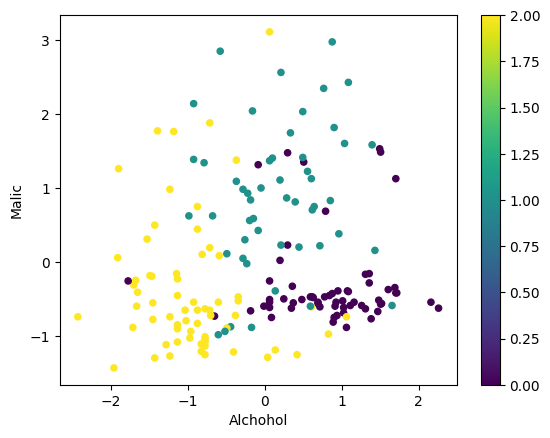

In [222]:
original_df.plot(x=0,y=1,c=kmeans_model.labels_,kind='scatter',cmap="viridis")
plt.xlabel("Alchohol")
plt.ylabel("Malic")
plt.show()

In [214]:
kmeans_model.cluster_centers_

array([[-0.92607185, -0.39404154, -0.49451676,  0.17060184, -0.49171185,
        -0.07598265,  0.02081257, -0.03353357,  0.0582655 , -0.90191402,
         0.46180361,  0.27076419, -0.75384618],
       [ 0.83523208, -0.30380968,  0.36470604, -0.61019129,  0.5775868 ,
         0.88523736,  0.97781956, -0.56208965,  0.58028658,  0.17106348,
         0.47398365,  0.77924711,  1.12518529],
       [ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796]])

In [215]:
labels_kmeans=kmeans_model.fit_predict(original_df)

In [216]:
silhouette_kmeans = silhouette_score(original_df,labels_kmeans )
print("KMeans Silhouette Score:", silhouette_kmeans)

KMeans Silhouette Score: 0.2848589191898987


# Clustering For PCA Data

In [217]:
kmeans_pca_model=KMeans(n_clusters=3).fit(pca_df_1)

In [218]:
kmeans_pca_model.inertia_

1033.2034984721317

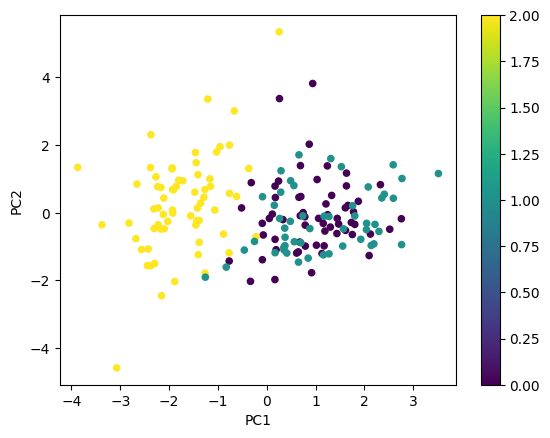

In [223]:
pca_df_1.plot(x=1,y=2,c=kmeans_pca_model.labels_,kind='scatter',cmap="viridis")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [224]:
labels_pca_kmeans=kmeans_pca_model.fit_predict(pca_df_1)

In [225]:
silhouette_kmeans = silhouette_score(pca_df_1,labels_pca_kmeans )
print("KMeans Silhouette Score:", silhouette_kmeans)

KMeans Silhouette Score: 0.3276351722402822


## Comparison and Analysis

1. Clustering results: Original vs. PCA-transformed data
   * Original dataset (with all features standardized):
        * K-Means captures detailed feature information, but some features may introduce noise or redundancy.
        * Silhouette score is often moderate because of the curse of dimensionality (distances become less meaningful).

    * PCA-transformed dataset (reduced dimensions):
       * PCA compressed the dataset into fewer dimensions while preserving most of the variance (e.g., 90–95%).
       * Clusters tend to be more compact and sometimes more clearly separated.
       * Silhouette score may improve because irrelevant/noisy features are removed.

2. Similarities and differences
   * Similarities:
     * The number of clusters remains the same (e.g., 3 clusters in the Wine dataset)
     * Some samples are grouped consistently in both original and PCA space.
   * Differences:
     * Cluster boundaries in PCA space may appear more distinct in visualization.
     * A few data points may switch cluster assignments since PCA discards weaker components.
       
Overall, PCA can lead to slightly higher or lower silhouette depending on how much cluster-separating variance is retained.

3. Impact of dimensionality reduction on clustering performance

* PCA removes noise and redundancy, making distance-based clustering (like K-Means) more effective.

* Lower dimensions = faster computation, simpler visualization.

But, if too few components are kept, important discriminating features may be lost, reducing clustering quality.

4. Trade-offs: PCA vs. original dataset

   * Using PCA:
     * Pros: noise reduction, improved silhouette (sometimes), faster computation, easier 2D/3D visualization.
     * Cons: loss of interpretability (components are linear combinations, not original features), risk of discarding important information.

    * Using Original Dataset:
      * Pros: full feature set retained, interpretability remains intact.
      * Cons: possible lower clustering quality due to noise, redundancy, and curse of dimensionality.

## Conclusion and Insights

1. Key findings
   * Clustering on the original dataset reflects raw data structure but may suffer from noise and high dimensionality.
   * Clustering on PCA-transformed data often produces more compact, well-separated clusters, especially when only the most informative components are retained.
   * Visualization of clusters is significantly easier in PCA space.

2. Practical implications
   * PCA is valuable as a preprocessing step before clustering, especially when datasets are high-dimensional.
   * For interpretability, clustering on original features is better, but for performance and visualization, clustering in PCA space often yields clearer results.

3. Recommendations
   * Use original dataset clustering if:
     * Feature interpretability is crucial.
     * Dimensionality is manageable (not too high).
   * Use PCA + clustering if:
     * Dataset has high dimensionality or noisy features.
     * Goal is visualization or efficiency.
     * You want to improve clustering performance by focusing on dominant variance directions.